Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

# Solución

In [1]:
# Libraries

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import listdir
import glob

%matplotlib inline

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [88]:
path = 'precios/'
files = listdir(path)
file_names = [f'{path}{file}' for file in files if (file.endswith('xls') or file.endswith('xlsx'))]
file_names.sort()
file_names

['precios/Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 'precios/Precio_Bolsa_Nacional_($kwh)_2013.xlsx',
 'precios/Precio_Bolsa_Nacional

In [180]:
def read_data_file(path):
    '''
    Reads the data from the xlsx files, deleting nan heads values
    '''
    
    index = 0
    data = pd.read_excel(path, skiprows=index)
    data.iloc[:,0] = data.iloc[:,0].astype(str)
    while data.iloc[0,0] != 'Fecha':
        data = pd.read_excel(path, skiprows=index, usecols=list(range(25)))
        data.iloc[:,0] = data.iloc[:,0].astype(str)
        index += 1
    data = pd.read_excel(path, skiprows=index, usecols=list(range(25)))
    data.iloc[:,0] = data.iloc[:,0].astype(str)
    return data


In [181]:
dfs = []
for file in file_names:
    dfs.append(read_data_file(file))
dfs = pd.concat(dfs)

In [211]:
# Pivots hours (columns) as rows
result=pd.melt(dfs,id_vars=['Fecha'], var_name='Hora', value_name='Precio')

# Formats the date
result['Fecha'] = pd.to_datetime(result['Fecha'], format='%Y-%m-%d')
result.tail()

,Fecha,Hora,Precio
201811,2018-05-01,23,64.229226
201812,2018-05-02,23,67.832816
201813,2018-05-03,23,63.710848
201814,2018-05-04,23,64.043453
201815,2018-05-05,23,75.242918


**2.--** Compute e imprima el número de registros con datos faltantes.

In [212]:
result.isnull().sum().sum()

454

In [218]:
result.shape[0]

201816

**3.--** Compute e imprima el número de registros duplicados.

In [217]:
duplicated = result[result.duplicated()]
duplicated.head()

,Fecha,Hora,Precio
531,1996-12-06,0,20.0
532,1996-12-07,0,9.8
533,1996-12-08,0,13.2
534,1996-12-09,0,13.0
535,1996-12-10,0,12.0


In [219]:
number_of_duplicated = duplicated.shape[0]
print(f'registros duplicados: {number_of_duplicated}')


registros duplicados: 1951


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [233]:
dfunique = result.copy()
dfunique = dfunique.drop_duplicates()
dfunique = dfunique.dropna()
non_duplicated = dfunique.shape[0]
print(f'registros unicos: {non_duplicated}')

registros unicos: 199819


**5.--** Compute y grafique el precio primedio diario.

In [267]:
df_day = dfunique.copy()
df_day['dia'] =  df_day[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_day = df_day.groupby('dia').apply(np.mean)
df_day

,Precio
dia,
Friday,109.002536
Monday,107.178698
Saturday,105.943442
Sunday,100.252102
Thursday,109.882748
Tuesday,109.527951
Wednesday,110.692152


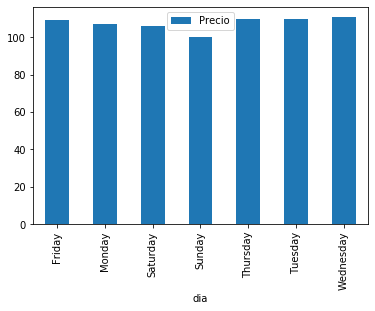

In [273]:
# Draws
df_day.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

In [277]:
df_month = dfunique.copy()
df_month['mes'] =  df_month[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
df_month.groupby()

,Fecha,Hora,Precio,mes
1,1995-07-21,0,1.073000,07
2,1995-07-22,0,1.073000,07
3,1995-07-23,0,1.073000,07
4,1995-07-24,0,1.000000,07
5,1995-07-25,0,0.990000,07
6,1995-07-26,0,0.500000,07
7,1995-07-27,0,0.500000,07
8,1995-07-28,0,0.000000,07
9,1995-07-29,0,1.000000,07
10,1995-07-30,0,1.072000,07


---